In [15]:
import pandas as pd

sentiment = pd.read_csv("fear_greed_index (1).csv")
trades = pd.read_csv("historical_data (1).csv")


In [2]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
trades.head()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')

In [6]:
trades['date'] = trades['Timestamp IST'].dt.date

In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date

In [8]:
trades[['Timestamp IST', 'date']].head()

,Timestamp IST,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12


In [9]:
merged_data = trades.merge(sentiment, on='date', how='left')

In [10]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [11]:
sentiment.rename(columns={
    'Date': 'date',
    'Classification': 'classification'
}, inplace=True)

In [12]:
print(trades['date'].dtype)
print(sentiment['date'].dtype)


object
object


In [13]:
merged_data = pd.merge(
    trades,
    sentiment,
    on='date',
    how='left'
)

In [14]:
merged_data[['date', 'classification']].head()

,date,classification
0,2024-02-12,Greed
1,2024-02-12,Greed
2,2024-02-12,Greed
3,2024-02-12,Greed
4,2024-02-12,Greed


In [16]:
merged_data['classification'].value_counts()


classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64

In [17]:
merged_data.groupby('classification')['Closed PnL'].mean()


classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64

In [18]:
merged_data.groupby('classification')['Closed PnL'].median()

classification
Extreme Fear     0.00000
Extreme Greed    0.96048
Fear             0.00000
Greed            0.00000
Neutral          0.00000
Name: Closed PnL, dtype: float64

In [19]:
merged_data['win'] = merged_data['Closed PnL'] > 0

In [20]:
merged_data.groupby('classification')['win'].mean()

classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: win, dtype: float64

In [21]:
merged_data.groupby('classification')['Start Position'].mean()

classification
Extreme Fear     21902.797505
Extreme Greed    24593.241160
Fear              8146.358518
Greed            37276.787811
Neutral          89199.587406
Name: Start Position, dtype: float64

In [22]:
merged_data.groupby('classification').size()


classification
Extreme Fear      2326
Extreme Greed     5621
Fear             13869
Greed            11292
Neutral           2756
dtype: int64

In [23]:
pd.crosstab(
    merged_data['classification'],
    merged_data['Side']
)

Side,BUY,SELL
classification,,
Extreme Fear,1168,1158
Extreme Greed,1661,3960
Fear,7307,6562
Greed,5407,5885
Neutral,1020,1736


In [24]:
merged_data.groupby('classification')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,2326.0,1.891632,76.727713,-1430.889856,0.0,0.00000,0.298102,2020.000000
Extreme Greed,5621.0,205.816345,1861.557119,-18360.670070,0.0,0.96048,30.153710,44223.451870
Fear,13869.0,128.287950,1342.348497,-19841.240140,0.0,0.00000,8.201820,71535.716740
Greed,11292.0,53.988003,1399.468182,-117990.104100,0.0,0.00000,13.441364,34903.817100
Neutral,2756.0,27.088803,142.945889,-1032.981540,0.0,0.00000,9.267691,2979.554311


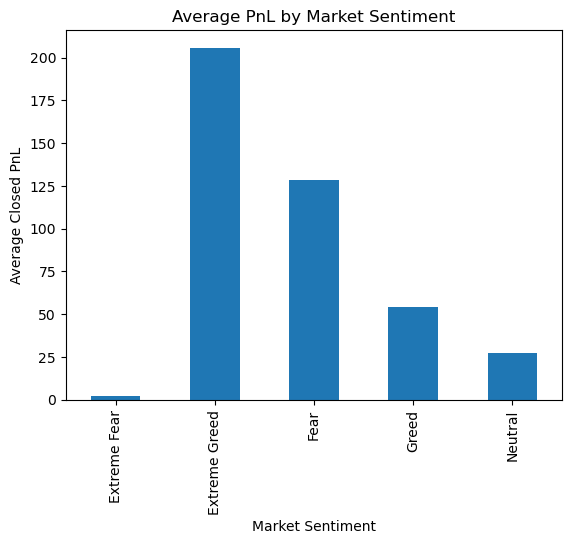

In [25]:
import matplotlib.pyplot as plt

avg_pnl = merged_data.groupby('classification')['Closed PnL'].mean()

avg_pnl.plot(kind='bar')
plt.title('Average PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()

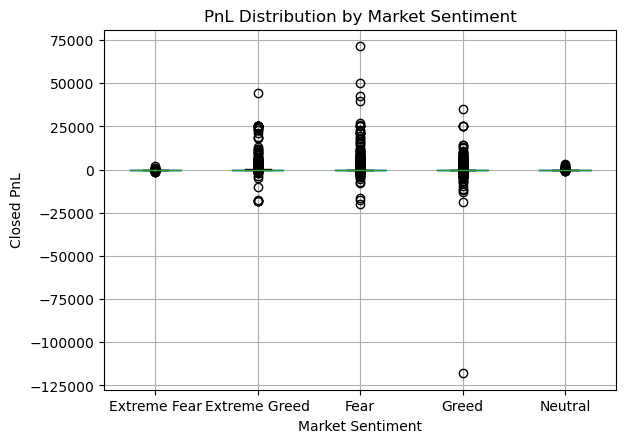

In [26]:
merged_data.boxplot(
    column='Closed PnL',
    by='classification'
)
plt.title('PnL Distribution by Market Sentiment')
plt.suptitle('')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()

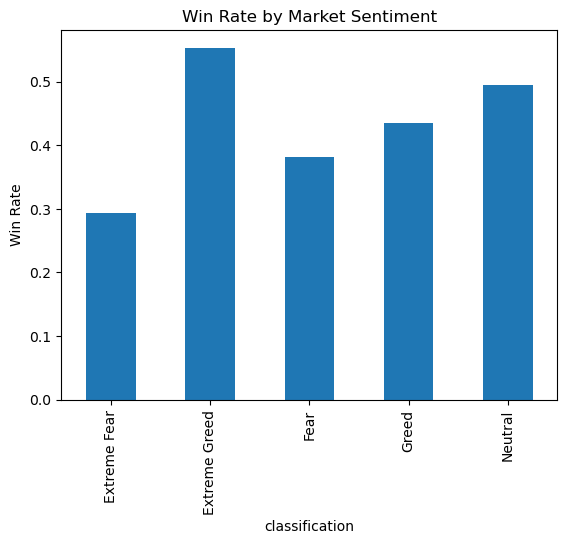

In [27]:
win_rate = merged_data.groupby('classification')['win'].mean()

win_rate.plot(kind='bar')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.show()

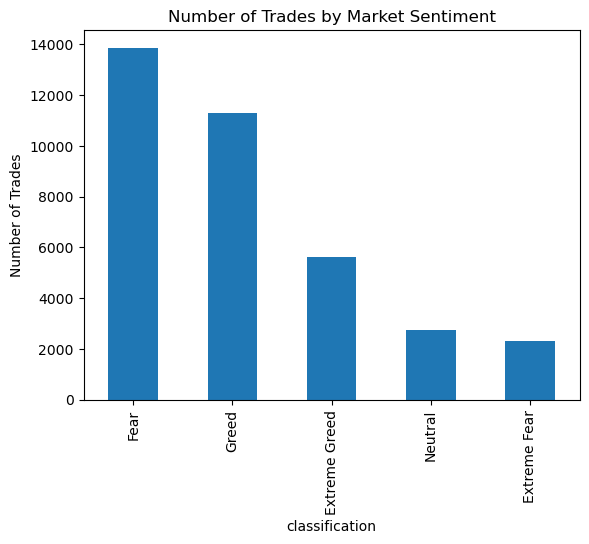

In [28]:
trade_count = merged_data['classification'].value_counts()

trade_count.plot(kind='bar')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()

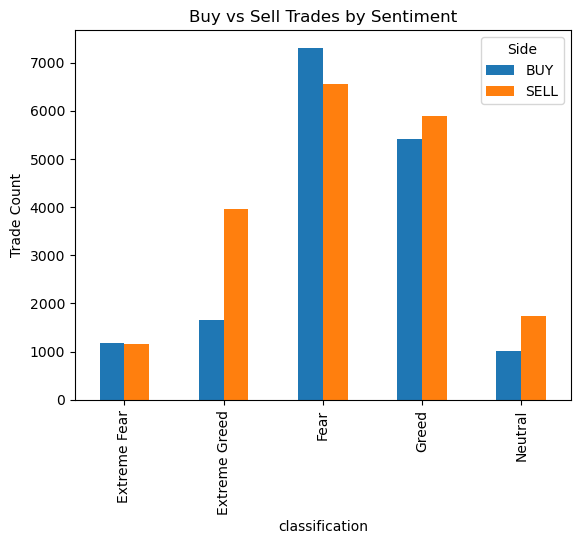

In [29]:
pd.crosstab(
    merged_data['classification'],
    merged_data['Side']
).plot(kind='bar')
plt.title('Buy vs Sell Trades by Sentiment')
plt.ylabel('Trade Count')
plt.show()

In [30]:
account_pnl = (
    merged_data
    .groupby(['Account', 'classification'])['Closed PnL']
    .sum()
    .reset_index()
)

account_pnl.head()


,Account,classification,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,0.000000e+00
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.010607e+06
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-4.501787e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Fear,0.000000e+00
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2.826578e+03


In [31]:
account_pivot = account_pnl.pivot(
    index='Account',
    columns='classification',
    values='Closed PnL'
).fillna(0)

account_pivot.head()


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,0.000000,0.000000,1.010607e+06,-45017.872815,0.000000
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.000000,0.000000,2.826578e+03,8758.308723,2517.787385
0x271b280974205ca63b716753467d5a371de622ab,0.000000,0.000000,0.000000e+00,208.817460,0.000000
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,400.093828,17645.398797,1.678161e+04,22639.472053,1068.309642
0x2c229d22b100a7beb69122eed721cee9b24011dd,160.127816,23897.024855,-7.107869e+02,19563.534860,130.883691


In [32]:
consistent_traders = account_pivot[
    (account_pivot['Fear'] > 0) &
    (account_pivot['Greed'] > 0)
]

consistent_traders.head()


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.000000,0.000000,2826.577976,8758.308723,2517.787385
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,400.093828,17645.398797,16781.609207,22639.472053,1068.309642
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,853.707848,2673.399582,6137.133700,3917.610613,1483.265351
0x4f93fead39b70a1824f981a54d4e55b278e9f760,3084.287743,-80565.682230,68938.323756,28159.421489,19252.488733
0x6d6a4b953f202f8df5bed40692e7fd865318264a,298.031364,1060.851032,392.354886,367.217295,0.000000


In [33]:
account_pivot.sort_values(by='Fear', ascending=False).head(5)


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,0.000000,0.000000,1.010607e+06,-45017.872815,0.000000
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,0.000000,0.000000,1.972949e+05,0.000000,0.000000
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,-5862.088776,0.000000,1.711983e+05,-120236.227323,0.000000
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,648.984412,997871.478418,1.481471e+05,332705.773842,-878.600945
0x4f93fead39b70a1824f981a54d4e55b278e9f760,3084.287743,-80565.682230,6.893832e+04,28159.421489,19252.488733


In [34]:
account_pivot.sort_values(by='Greed', ascending=False).head(5)


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Account,,,,,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,648.984412,997871.478418,148147.055383,332705.773842,-878.600945
0xbaaaf6571ab7d571043ff1e313a9609a10637864,3869.208803,0.000000,9367.872074,188116.840712,0.000000
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,0.000000,15641.746402,35471.172206,68045.186468,23425.594181
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.000000,0.000000,0.000000,60544.304874,0.000000
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,-40.712217,-10669.833858,3938.327943,34709.852428,-219.729659
